In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('/content/dataset.csv')

df.head()

,Date,CNY=X,OMR=X,IRR=X,THB=X,SYP=X,EUR=X,MYR=X,YER=X,VND=X,...,LBP=X,TRY=X,TMT=X,SAR=X,MVR=X,QAR=X,MMK=X,NPR=X,BND=X,AFN=X
0,1/1/2004,NaN,0.38,NaN,39.24,NaN,0.79,3.81,NaN,NaN,...,NaN,NaN,NaN,3.75,NaN,3.64,NaN,NaN,1.69,NaN
1,1/2/2004,8.27,0.38,8236.2,39.53,47.23,0.79,3.80,NaN,15147.0,...,1474.1,NaN,NaN,3.75,NaN,3.64,6.18,70.60,1.68,NaN
2,1/5/2004,8.27,0.38,8731.5,39.26,47.25,0.79,3.80,NaN,15148.0,...,1474.6,NaN,NaN,3.75,NaN,3.64,6.18,70.62,1.68,NaN
3,1/6/2004,8.27,0.38,8724.7,39.03,47.21,0.79,3.80,NaN,15150.0,...,1473.8,NaN,NaN,3.75,NaN,3.64,6.18,70.58,1.68,NaN
4,1/7/2004,8.27,0.38,8728.7,38.97,47.22,0.79,3.81,NaN,15153.0,...,1474.3,NaN,NaN,3.75,NaN,3.64,6.18,70.60,1.68,NaN


In [4]:
df.columns


Index(['Date', 'CNY=X', 'OMR=X', 'IRR=X', 'THB=X', 'SYP=X', 'EUR=X', 'MYR=X',
       'YER=X', 'VND=X', 'ILS=X', 'JPY=X', 'LKR=X', 'IQD=X', 'PKR=X', 'KWD=X',
       'KHR=X', 'UZS=X', 'SGD=X', 'INR=X', 'BDT=X', 'PHP=X', 'JOD=X', 'LAK=X',
       'IDR=X', 'KRW=X', 'KZT=X', 'AED=X', 'BHD=X', 'LBP=X', 'TRY=X', 'TMT=X',
       'SAR=X', 'MVR=X', 'QAR=X', 'MMK=X', 'NPR=X', 'BND=X', 'AFN=X'],
      dtype='object')

In [5]:
df.describe()

,CNY=X,OMR=X,IRR=X,THB=X,SYP=X,EUR=X,MYR=X,YER=X,VND=X,ILS=X,...,LBP=X,TRY=X,TMT=X,SAR=X,MVR=X,QAR=X,MMK=X,NPR=X,BND=X,AFN=X
count,4941.000000,4946.000000,4141.000000,4927.000000,3247.000000,4928.000000,4948.000000,4726.000000,4949.000000,4926.000000,...,4919.000000,4680.000000,3419.000000,4923.000000,4550.000000,4943.000000,4935.000000,4918.000000,4923.000000,2935.000000
mean,6.886448,0.379990,21800.876165,33.589533,148.981478,0.811289,3.712427,220.234922,19962.675518,3.780292,...,1489.697073,3.802132,3.177078,3.748661,14.314125,3.629749,743.274424,90.672349,1.363914,127.300750
std,0.647358,0.000817,15063.854790,3.105895,184.528112,0.080617,0.450958,27.434909,3036.422619,0.375456,...,54.961968,3.820930,0.267509,0.008688,1.197709,0.040454,683.615046,19.755909,0.170233,1677.829053
min,5.860000,0.370000,40.000000,28.070000,41.020000,0.630000,2.900000,0.100000,20.890000,3.080000,...,0.880000,1.140000,2.080000,3.300000,12.000000,3.000000,6.050000,61.430000,0.660000,17.600000
25%,6.380000,0.380000,9113.000000,31.270000,46.980000,0.750000,3.270000,199.750000,16525.000000,3.510000,...,1475.695000,1.510000,2.850000,3.750000,12.650000,3.640000,6.310000,70.560000,1.290000,51.280000
50%,6.780000,0.380000,11169.000000,32.750000,50.370000,0.810000,3.750000,214.750000,20912.000000,3.720000,...,1499.900000,2.085000,3.350000,3.750000,15.150000,3.640000,945.640000,93.580000,1.350000,67.520000
75%,7.070000,0.380000,42000.000000,35.150000,99.370000,0.880000,4.140000,249.750000,22675.000000,3.940000,...,1507.000000,4.740000,3.400000,3.750000,15.210000,3.640000,1340.000000,107.377500,1.430000,77.000000
max,8.280000,0.390000,90000.000000,42.100000,514.000000,1.040000,4.750000,250.800000,24871.000000,4.730000,...,1533.500000,18.700000,3.850000,3.780000,15.850000,3.900000,2090.550000,131.330000,1.710000,50235.000000


In [6]:
df.shape

(4956, 39)

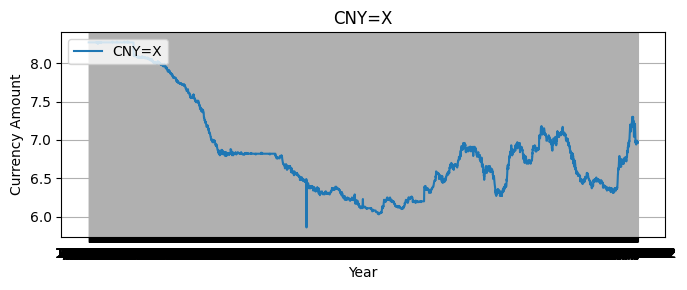

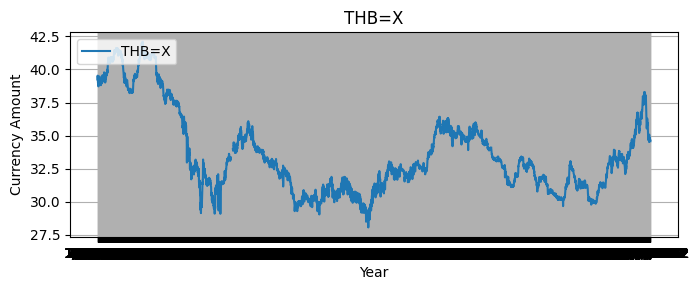

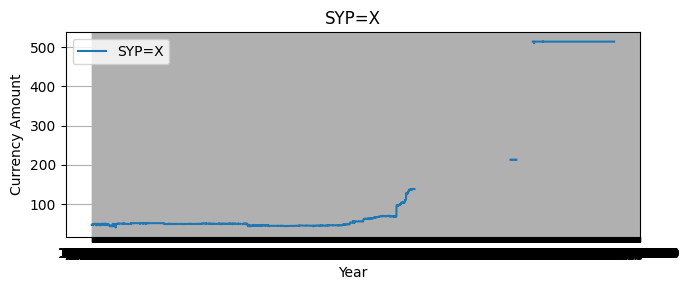

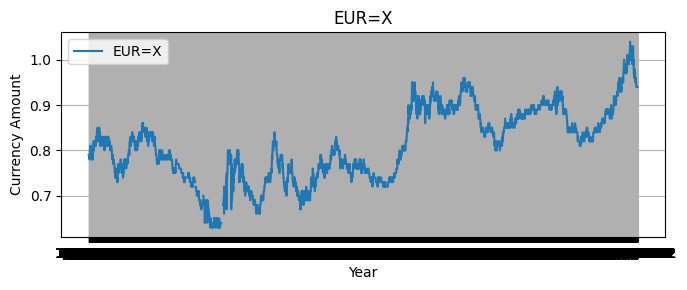

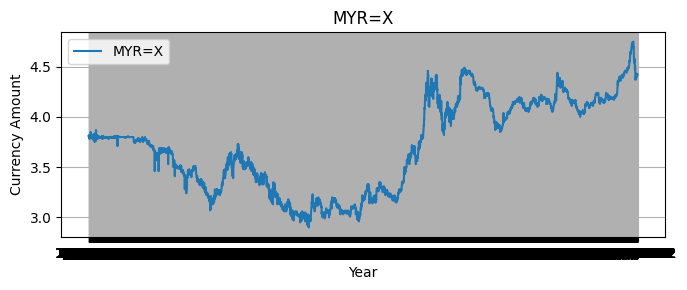

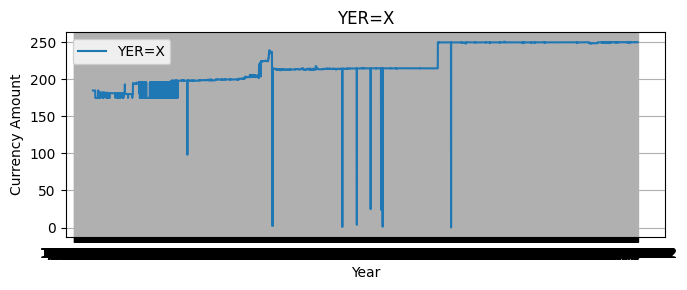

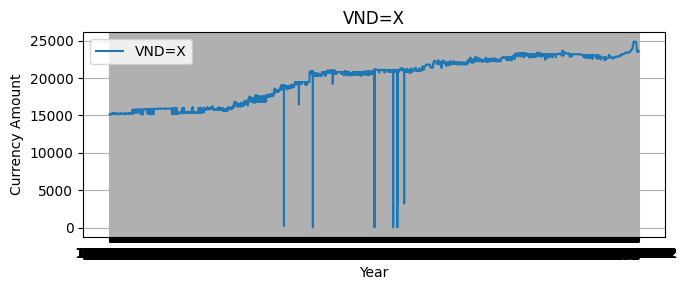

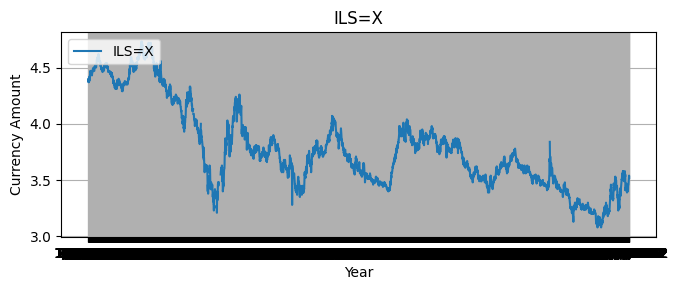

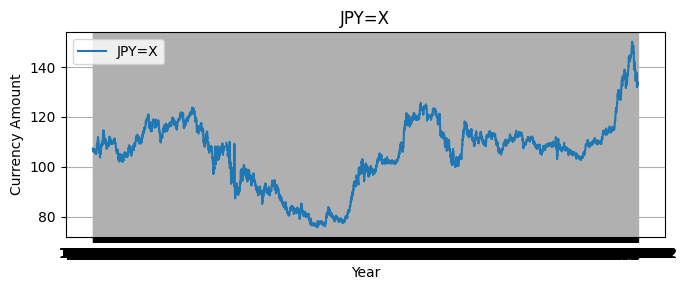

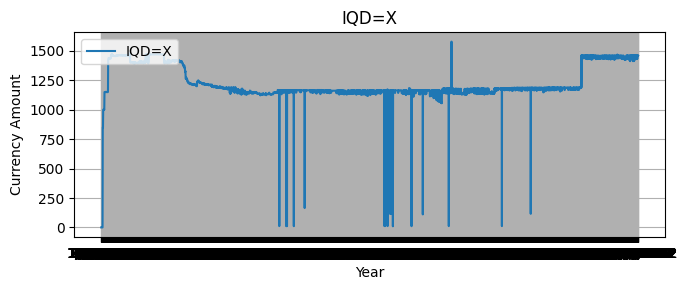

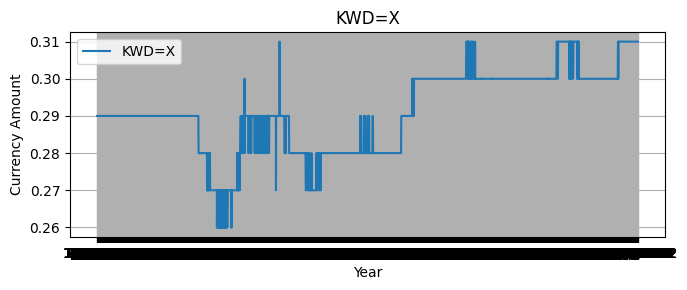

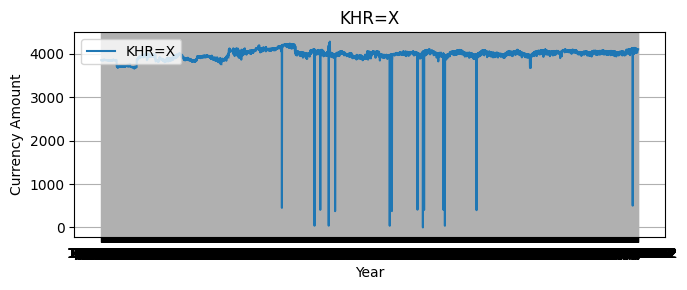

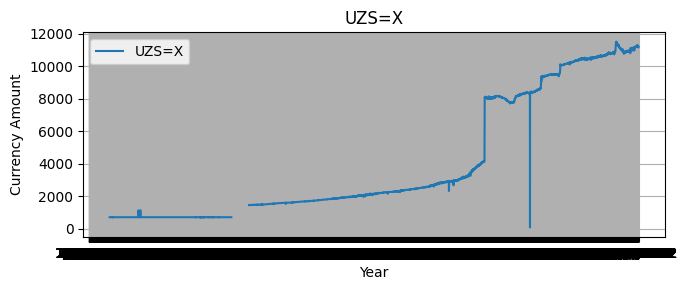

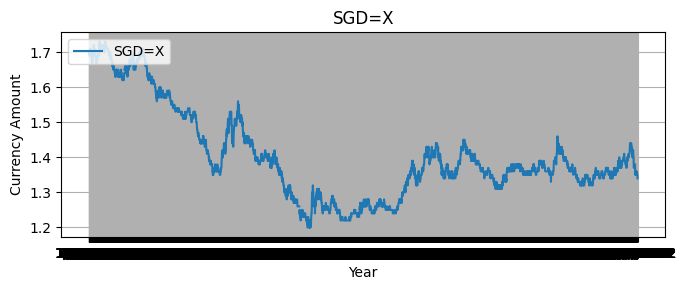

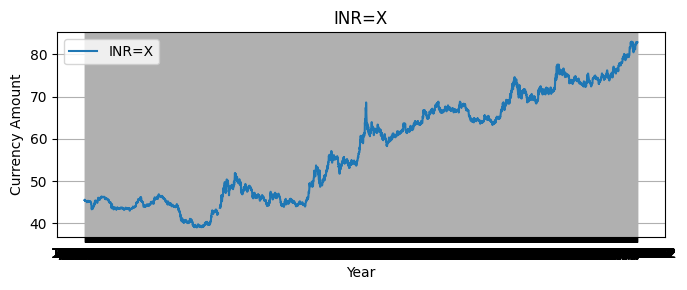

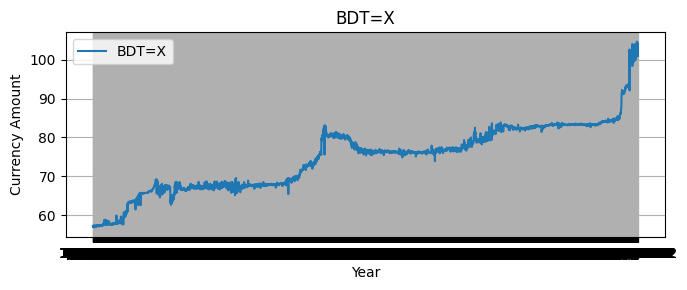

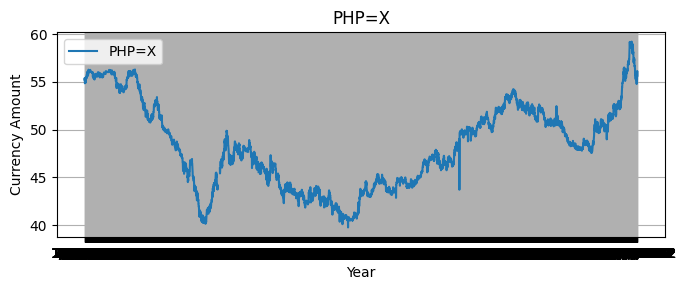

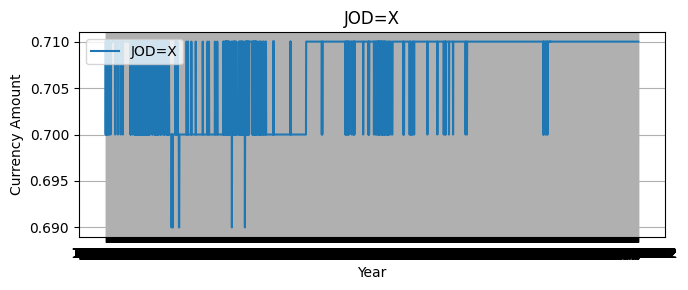

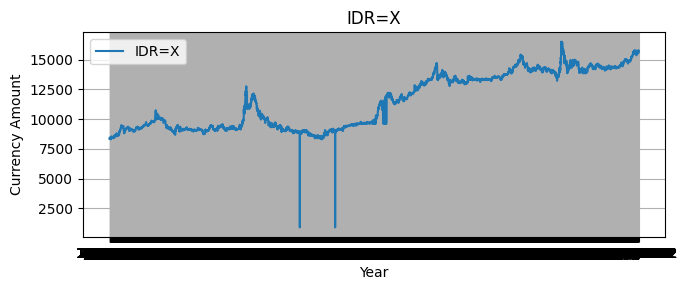

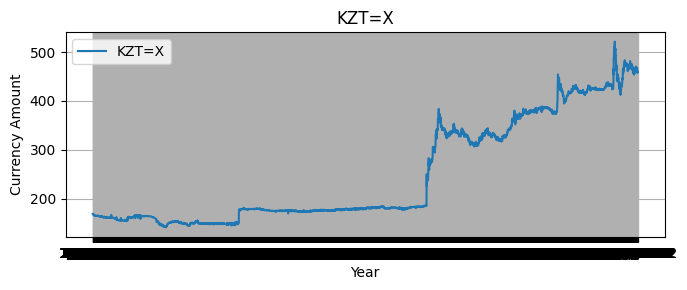

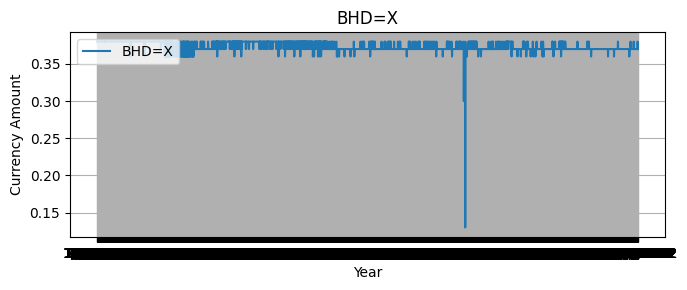

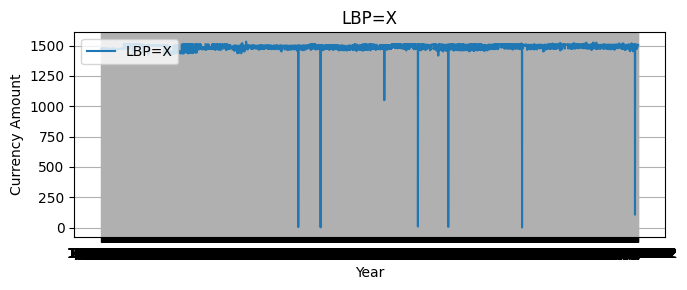

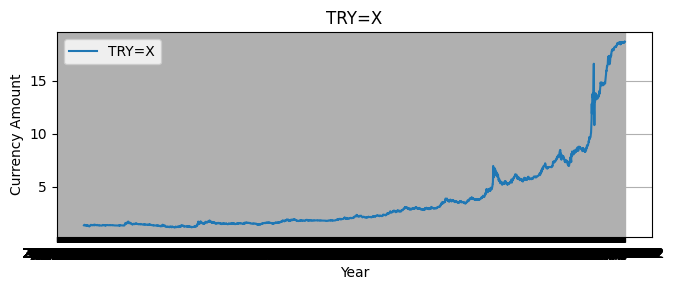

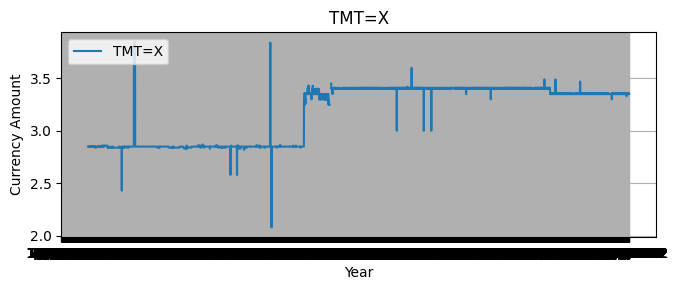

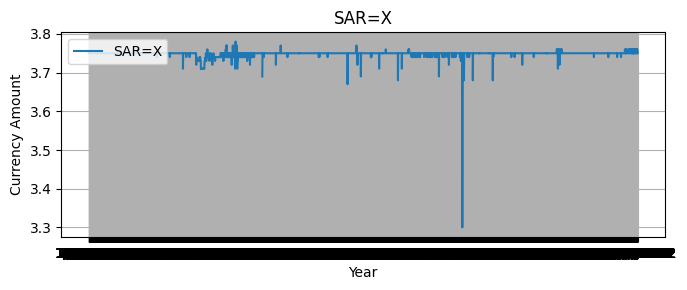

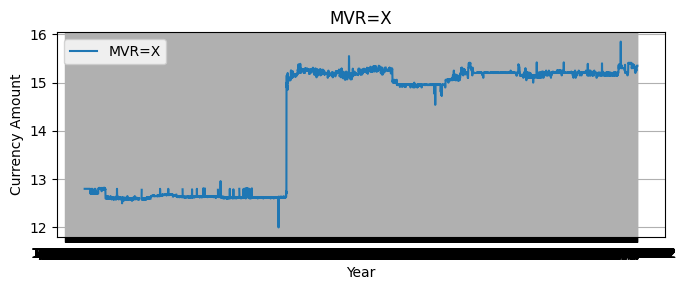

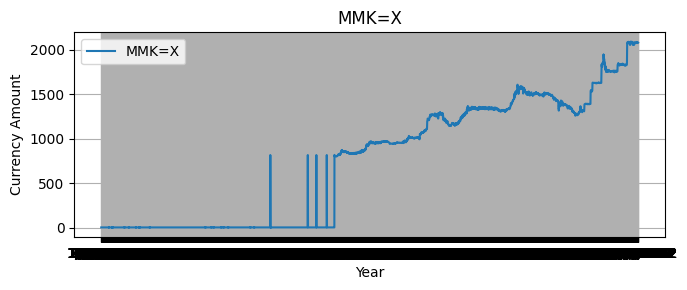

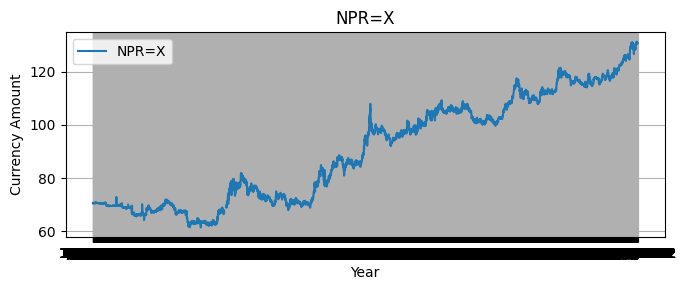

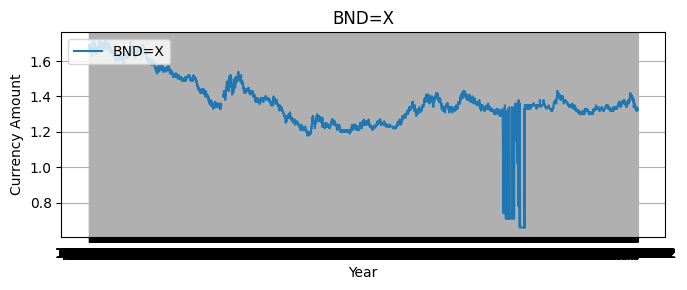

In [7]:
cols_to_plot = ['CNY=X', 'THB=X', 'SYP=X', 'EUR=X', 'MYR=X', 'YER=X', 'VND=X',
       'ILS=X', 'JPY=X', 'IQD=X', 'KWD=X', 'KHR=X', 'UZS=X', 'SGD=X', 'INR=X',
       'BDT=X', 'PHP=X', 'JOD=X', 'IDR=X', 'KZT=X', 'BHD=X', 'LBP=X', 'TRY=X',
       'TMT=X', 'SAR=X', 'MVR=X', 'MMK=X', 'NPR=X', 'BND=X']


for column in cols_to_plot:
    plt.figure(figsize=(7, 3))
    plt.plot(df['Date'], df[column], label=column)
    plt.xlabel('Year')
    plt.ylabel(f'Currency Amount')
    plt.title(f'{column}')
    plt.legend(loc='upper left')  # Specify the legend position
    plt.grid(True)  # Add grid lines to the plot
    plt.tight_layout()  # Automatically adjust spacing
    plt.show()

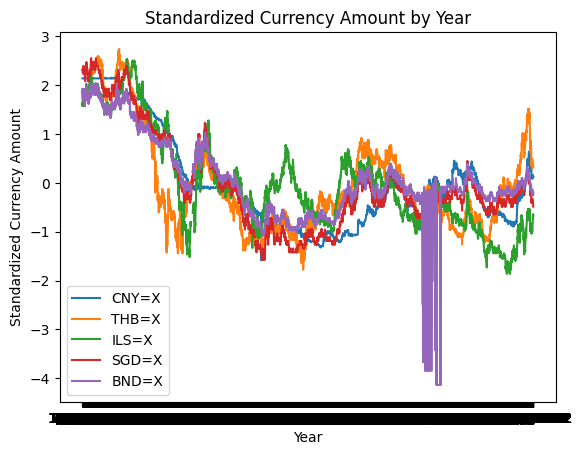

In [8]:
cols_to_standardize = ['CNY=X', 'THB=X', 'ILS=X', 'SGD=X', 'BND=X']
df_subset = df[cols_to_standardize]

# Standardize the subset
df_subset_std = (df_subset - df_subset.mean()) / df_subset.std()

# Plot the standardized subset
for column in df_subset_std.columns:
    plt.plot(df.Date, df_subset_std[column], label=column)
    
plt.xlabel('Year')
plt.ylabel('Standardized Currency Amount')
plt.title('Standardized Currency Amount by Year')
plt.legend()
plt.show()